[[ 2  5]
 [ 8  4]
 [ 5  8]
 [ 7  5]
 [ 6  4]
 [ 1  2]
 [ 4  9]
 [12 11]
 [22 34]
 [11 22]
 [ 3  6]
 [34 34]
 [43 45]]
[[ 2  5]
 [ 8  4]
 [ 5  8]
 [ 7  5]
 [ 6  4]
 [ 1  2]
 [ 4  9]
 [12 11]
 [22 34]
 [11 22]
 [ 3  6]
 [34 34]
 [43 45]]


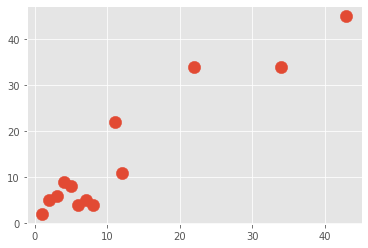

101
[2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0]
[[37.70085410293704, 39.376909092295875], [14.187425004871837, 24.665806621884325], [4.98285218339124, 5.750277051105793]]


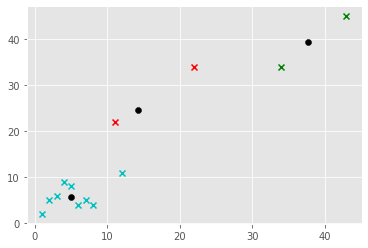

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import random
import operator
import math
import pandas as pd

X1 = pd.read_csv('Data1.csv')

X = np.array(X1)
print(X)    
        
#X = np.array([[3,3],[4,10],[9,6],[14,8],[18,11],[21,7]])
print(X)
k=3
MAX_ITER = 100
m = 2
df = 2

tol = 0.0001

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()


colors = 10*["g","r","c","b","k"]


def initializeMembershipMatrix():
    membership_mat = list()
    for i in range(len(X)):
        random_num_list = [random.random() for i in range(k)]
        summation = sum(random_num_list)
        temp_list = [x/summation for x in random_num_list]
        membership_mat.append(temp_list)
    return membership_mat

def calculateClusterCenter(membership_mat):
    cluster_mem_val_1 = list(zip(*membership_mat))
    cluster_mem_val=[]
    for i in cluster_mem_val_1:
        cluster_mem_val.append(list(i))
    cluster_centers = list()
    for j in range(k):
        x = list(cluster_mem_val[j])
        xraised = [e ** m for e in x]
        denominator = sum(xraised)
        temp_num = list()
        for i in range(len(X)):
            data_point = X[i]
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, zip(*temp_num))
        center = [z/denominator for z in numerator]
        cluster_centers.append(center)
    return cluster_centers


def updateMembershipValue(membership_mat, cluster_centers):
    p = float(2/(m-1))
    for i in range(len(X)):
        x = X[i]
        distances = [np.linalg.norm(list(map(operator.sub, x,cluster_centers[j]))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            membership_mat[i][j] = float(1/den)       
    return membership_mat


def getClusters(membership_mat):
    cluster_labels = list()
    for i in range(len(X)):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels


def fuzzyCMeansClustering():
    # Membership Matrix
    membership_mat = initializeMembershipMatrix()
    curr = 0
    prevm = np.array([[0 for i in range(len(membership_mat[j]))] for j in range(len(membership_mat))])
    while curr <= MAX_ITER:
        
        prevm = np.array([[membership_mat[j][i] for i in range(len(membership_mat[j]))] for j in range(len(membership_mat))])
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        curr += 1
        
        optim = True
        for i in range(len(membership_mat)):
            for j in range(len(membership_mat[i])):
                if abs(((membership_mat[i][j] - prevm[i][j])/prevm[i][j]) * 100)>tol:
                    optim = False
        
        if optim == True:
          break
        
    print(curr)
        
    return cluster_labels, cluster_centers
    


labels, centers = fuzzyCMeansClustering()
print(labels)
print(centers)

tempa = np.array(centers)

plt.scatter(tempa[:,0],tempa[:,1],color = 'black')
ind=0

for arr in X:
    plt.scatter(arr[0],arr[1],marker = 'x',color = colors[labels[ind]])
    ind=ind+1
    
plt.show()


